**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

**Reading the dataset**

In [2]:
matches=pd.read_csv("/content/drive/MyDrive/matches.csv")
matches.shape
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
deliveries=pd.read_csv("/content/drive/MyDrive/deliveries.csv")
deliveries.shape
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
deliveries= deliveries.rename(columns={'match_id': 'id'})
deliveries.head()

,id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


**Merging the two dataset**

In [5]:
data = pd.merge(left=matches, right=deliveries, on='id', how='right')
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

**Null values in the dataset**

In [7]:
data.isnull().sum()

id                       0
season                   0
city                  1700
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                 372
win_by_runs              0
win_by_wickets           0
player_of_match        372
venue                    0
umpire1                500
umpire2                500
umpire3             150712
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
f

**Removing unwanted columns**

In [8]:
data.drop(['umpire3'],axis='columns',inplace=True)
data.drop(['dismissal_kind'],axis='columns',inplace=True)
data.drop(['fielder'],axis='columns',inplace=True)

In [9]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = pd.DatetimeIndex(data['date']).year
data['over'] = data['over']+1
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,year
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,2017
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,2017
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,2017
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,2017
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,2017


In [10]:
data['inning'] = data['id'].astype(str)+(data['batting_team']).astype(str)
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,year
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,2017
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,2017
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,2017
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,2,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,2017
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,2017


**Introducing new column of is_wicket**

In [11]:
data.loc[data["player_dismissed"].isnull()==True,"is_wicket"]=0
data.loc[data["player_dismissed"].isnull()==False,"is_wicket"]=1

**Making list of all innings name**

In [12]:
list1 = data['inning'].unique()
(list1)

array(['1Sunrisers Hyderabad', '1Royal Challengers Bangalore',
       '2Mumbai Indians', ..., '11414Chennai Super Kings',
       '11415Mumbai Indians', '11415Chennai Super Kings'], dtype=object)

**Getting total runs of an inning**

In [13]:
data2 = data.copy()
data2 = data2.groupby(by=['inning']).sum()['total_runs'].reset_index()
data2

,inning,total_runs
0,100Delhi Daredevils,118
1,100Kings XI Punjab,94
2,101Rajasthan Royals,197
3,101Royal Challengers Bangalore,132
4,102Deccan Chargers,153
...,...,...
1505,98Delhi Daredevils,194
1506,99Kolkata Knight Riders,67
1507,99Mumbai Indians,68
1508,9Delhi Daredevils,205


**Merging innings data with total score data**

In [14]:
data3 = pd.merge(left=data2, right=data, on='inning', how='right')
print(data3.shape)
data3.head()

(179078, 38)


,inning,total_runs_x,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,year,is_wicket
0,1Sunrisers Hyderabad,207,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,2017,0.0
1,1Sunrisers Hyderabad,207,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,2017,0.0
2,1Sunrisers Hyderabad,207,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,2017,0.0
3,1Sunrisers Hyderabad,207,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Sunrisers Hyderabad,Royal Challengers Bangalore,2,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,2017,0.0
4,1Sunrisers Hyderabad,207,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,2017,0.0


**Introducing new column of cumulative runs and cumulative wickets after every ball**

In [15]:
container = pd.DataFrame()
for i in range(len(list1)):
    one_inning = data3.loc[data3['inning']==list1[i]]
    one_inning = one_inning.sort_values(['over', 'ball'], ascending=[True, True])
    one_inning = one_inning[['over','ball',
            'batsman_runs','extra_runs','total_runs_y','total_runs_x','batting_team','bowling_team','venue','is_wicket']].reset_index(drop=True)
    one_inning['CUMSUM_runs'] = one_inning['total_runs_y'].cumsum()
    one_inning['CUMSUM_wickets'] = one_inning['is_wicket'].cumsum()


    one_inning.tail()
    frame = [container,one_inning]
    container = pd.concat(frame)
print(data3.shape)
print(container.shape)


(179078, 38)
(179078, 12)


In [16]:
data3 = container.copy()
container.head()

,over,ball,batsman_runs,extra_runs,total_runs_y,total_runs_x,batting_team,bowling_team,venue,is_wicket,CUMSUM_runs,CUMSUM_wickets
0,2,1,0,0,0,207,Sunrisers Hyderabad,Royal Challengers Bangalore,"Rajiv Gandhi International Stadium, Uppal",0.0,0,0.0
1,2,2,0,0,0,207,Sunrisers Hyderabad,Royal Challengers Bangalore,"Rajiv Gandhi International Stadium, Uppal",0.0,0,0.0
2,2,3,4,0,4,207,Sunrisers Hyderabad,Royal Challengers Bangalore,"Rajiv Gandhi International Stadium, Uppal",0.0,4,0.0
3,2,4,0,0,0,207,Sunrisers Hyderabad,Royal Challengers Bangalore,"Rajiv Gandhi International Stadium, Uppal",0.0,4,0.0
4,2,5,0,2,2,207,Sunrisers Hyderabad,Royal Challengers Bangalore,"Rajiv Gandhi International Stadium, Uppal",0.0,6,0.0


**Defining useful features for processing**

In [17]:
featureColumns = ['over','ball',
         'batsman_runs','extra_runs','total_runs_y','CUMSUM_runs','CUMSUM_wickets','venue','batting_team','bowling_team','is_wicket']
print(len(featureColumns))

11


**Replacing string values with numeric values**

In [18]:
encoder=LabelEncoder()

In [19]:
data3["venue"]=encoder.fit_transform(data3["venue"])
data3["batting_team"]=encoder.fit_transform(data3["batting_team"])
data3["bowling_team"]=encoder.fit_transform(data3["bowling_team"])        

In [20]:
data3.head()

,over,ball,batsman_runs,extra_runs,total_runs_y,total_runs_x,batting_team,bowling_team,venue,is_wicket,CUMSUM_runs,CUMSUM_wickets
0,2,1,0,0,0,207,14,13,28,0.0,0,0.0
1,2,2,0,0,0,207,14,13,28,0.0,0,0.0
2,2,3,4,0,4,207,14,13,28,0.0,4,0.0
3,2,4,0,0,0,207,14,13,28,0.0,4,0.0
4,2,5,0,2,2,207,14,13,28,0.0,6,0.0


**Defining current over by merging over and current ball for one useful feature**

In [21]:
data3['over_cur'] = data3['over'] + data3['ball']/10
data3 = data3[['over_cur',
               'batsman_runs','total_runs_y','CUMSUM_runs','CUMSUM_wickets','total_runs_x','batting_team','bowling_team','venue','is_wicket']]
data3.astype(float)
data3 = data3.fillna(-99.00)
data3.isnull().values.any()
import pandas as pd
from sklearn import preprocessing
data3.head()

,over_cur,batsman_runs,total_runs_y,CUMSUM_runs,CUMSUM_wickets,total_runs_x,batting_team,bowling_team,venue,is_wicket
0,2.1,0,0,0,0.0,207,14,13,28,0.0
1,2.2,0,0,0,0.0,207,14,13,28,0.0
2,2.3,4,4,4,0.0,207,14,13,28,0.0
3,2.4,0,0,4,0.0,207,14,13,28,0.0
4,2.5,0,2,6,0.0,207,14,13,28,0.0


In [22]:
def custom_accuracy(y_test,y_pred,thresold=10):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
        else:
          print('p',y_pred[i]*300,y_test[i]*300)
    return (right)

In [23]:
def custom_accuracy2(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

**Splitting the data into testing and training data**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = data3.iloc[:,[0,1,2,3,4,6,7,8,9]].values #Input features
y = data3.iloc[:, 5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Prediction using GradientBoostingRegressor**

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
y_pred1=reg.predict(X_test)
reg.score(X_test, y_test)*100

41.96953393397539

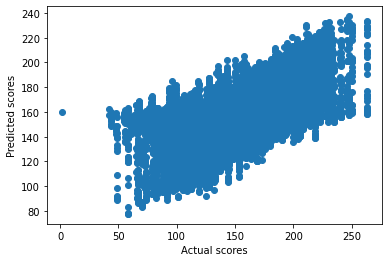

In [40]:
plt.scatter(y_test,y_pred1)
plt.xlabel('Actual scores')
plt.ylabel('Predicted scores')
plt.show()

In [27]:
mae1=mean_absolute_error(y_test,y_pred1)
mae1

17.054195366902924

In [28]:
rmse1=np.sqrt(mean_squared_error(y_test,y_pred1))
rmse1

23.09075481514526

In [29]:
y_test = np.asarray(y_test).astype('float32')
y_pred1 = np.asarray(y_pred1).astype('float32')
print("Custom accuracy: {:.3f} %".format(custom_accuracy2(y_test,y_pred1,10)))

Custom accuracy: 41.304 %


**Prediction using RandomForestRegressor**

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,max_features=None)
model =rf.fit(X_train,y_train)
y_pred2 = rf.predict(X_test)
score = rf.score(X_test,y_test)*100
print("Score value:" , score)

Score value: 77.74633065492208


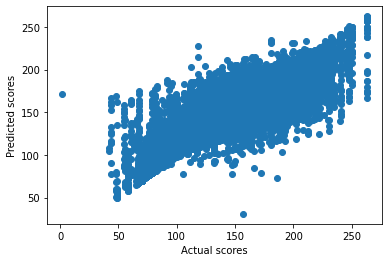

In [42]:
plt.scatter(y_test,y_pred2)
plt.xlabel('Actual scores')
plt.ylabel('Predicted scores')
plt.show()

In [32]:
mae2=mean_absolute_error(y_test,y_pred2)
mae2

9.103905599565724

In [33]:
rmse2=np.sqrt(mean_squared_error(y_test,y_pred2))
rmse2

14.29917281813732

In [34]:
y_test = np.asarray(y_test).astype('float32')
y_pred2 = np.asarray(y_pred2).astype('float32')
cr1=custom_accuracy2(y_test,y_pred2,10)
cr1

69.85257985257985

**Prediction using ExtraTreesRegressor**

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
rege = ExtraTreesRegressor(n_estimators=100, random_state=0)
rege.fit( X_train, y_train)
y_pred3=reg.predict(X_test)
rege.score(X_test, y_test)*100

74.96218876082507

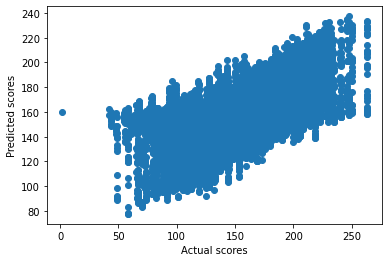

In [41]:
plt.scatter(y_test,y_pred3)
plt.xlabel('Actual scores')
plt.ylabel('Predicted scores')
plt.show()

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
m3=mean_absolute_error(y_test,y_pred3)
m3

17.054195366902924

In [38]:
mse3=np.sqrt(mean_squared_error(y_test,y_pred3))
mse3

23.09075481514526

In [39]:
y_test = np.asarray(y_test).astype('float32')
y_pred3 = np.asarray(y_pred3).astype('float32')
cr3=custom_accuracy2(y_test,y_pred3,10)
cr3

41.30444494080858